## **Práctica 13: Clasificación de la mortalidad por COVID-19**

Nombre: Alan Francisco Mora González

No. Cuenta: 113005901

Email: alanfmorag@gmail.com

### **Caso de estudio**

**Objetivo.** Clasificar la mortalidad de adultos mayores contagiados con COVID-19 en la Ciudad de México.

**Emplear los algoritmos:** 

* Árbol de decisión.
* Bosque aleatorio.

**Fuente de datos:**

https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia

**Variables:**

No.	| Nombre | Descripción | Valores
* ID
* 1	SEXO	Identifica el sexo del paciente.	1-Mujer, 2-Hombre, 99-No Especificado
* 2	TIPO_PACIENTE	Identifica el tipo de atención que recibió el paciente.	1-Ambulatorio, 2-Hospitalizado, 99-No Especificado 
* 3	SITUACION	Identifica la situación (vivo o muerto) del paciente. 	1-Vivo 
2-Muerto
* 4	INTUBADO	Identifica si el paciente requirió de intubación.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 5	NEUMONIA	Identifica si el paciente se le diagnosticó con neumonía.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 6	EDAD	Identifica la edad del paciente.	Numérico
* 7	DIABETES	Identifica si el paciente tiene un diagnóstico de diabetes.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 8	EPOC	Identifica si el paciente tiene un diagnóstico de Enfermedad Pulmonar Obstructiva Crónica (EPOC).	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 9	ASMA	Identifica si el paciente tiene un diagnóstico de asma.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 10	INMUSUPPR	Identifica si el paciente tiene un diagnóstico de inmunosupresión.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 11	HIPERTENSION	Identifica si el paciente tiene un diagnóstico de hipertensión.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 12	OTRA_COM	Identifica si el paciente tiene diagnóstico de otras enfermedades.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 13	CARDIOVASCULAR	Identifica si el paciente tiene un diagnóstico de enfermedades cardiovasculares.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 14	OBESIDAD	Identifica si el paciente tiene diagnóstico de obesidad.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 15	RENAL_CRONICA	Identifica si el paciente tiene diagnóstico de insuficiencia renal crónica.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 16	TABAQUISMO	Identifica si el paciente tiene hábito de tabaquismo.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 17	OTRO_CASO	Identifica si el paciente tuvo contacto con algún otro caso diagnosticado con SARS-CoV-2.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 18	RESULTADO_ANTIGENO	Identifica el resultado del análisis de la muestra de antígeno para SARS-CoV-2.	1-Positivo SARS-CoV-2, 2-Negativo SARS-CoV-2, 97- No Aplica (Caso sin muestra)
* 19	CLASIFICACION_FINAL	Identifica la clasificación del resultado de la prueba Covid-19: confirmado, inválido, no realizado, sospechoso y negativo.	1-Confirmado por Asociación Clínica Epidemiológica, 2-Confirmado por comité de Dictaminación, 3-Caso confirmado, 4-Inválido por laboratorio, 5-No realizado por laboratorio, 6-Caso sospechoso, 7-Negativo a SARS-CoV-2. 
* 20	UCI	Identifica si el paciente requirió ingresar a una Unidad de Cuidados Intensivos (UCI).	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alanmgg/Data-Mining/main/Datos/CovidAdultosMayores.csv"
data_covid = pd.read_csv(url)
data_covid

,ID,SEXO,TIPO_PACIENTE,SITUACION,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
0,21,2,1,Vivo,5,2,62,2,2,2,...,1,2,2,2,2,2,2,5,6,5
1,23,1,1,Vivo,5,2,67,1,2,2,...,2,2,2,2,2,2,1,5,3,5
2,31,1,1,Vivo,5,2,62,2,2,2,...,1,2,2,1,2,2,1,1,3,5
3,39,1,1,Vivo,5,2,76,2,2,2,...,2,2,2,2,2,2,2,5,5,5
4,81,1,1,Vivo,5,2,60,2,2,2,...,2,2,2,1,2,2,2,5,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591347,15563006,1,1,Vivo,5,2,67,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591348,15563010,2,1,Vivo,5,2,68,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591349,15563012,2,1,Vivo,5,2,69,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591350,15563014,2,1,Vivo,5,2,71,4,4,4,...,4,4,4,4,4,4,1,2,7,5


In [3]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591352 entries, 0 to 591351
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   591352 non-null  int64 
 1   SEXO                 591352 non-null  int64 
 2   TIPO_PACIENTE        591352 non-null  int64 
 3   SITUACION            591352 non-null  object
 4   INTUBADO             591352 non-null  int64 
 5   NEUMONIA             591352 non-null  int64 
 6   EDAD                 591352 non-null  int64 
 7   DIABETES             591352 non-null  int64 
 8   EPOC                 591352 non-null  int64 
 9   ASMA                 591352 non-null  int64 
 10  INMUSUPR             591352 non-null  int64 
 11  HIPERTENSION         591352 non-null  int64 
 12  OTRA_COM             591352 non-null  int64 
 13  CARDIOVASCULAR       591352 non-null  int64 
 14  OBESIDAD             591352 non-null  int64 
 15  RENAL_CRONICA        591352 non-nu

In [4]:
print(data_covid.groupby('SITUACION').size())

SITUACION
Finado     34296
Vivo      557056
dtype: int64


In [5]:
data_covid.describe()

,ID,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
count,5.913520e+05,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000
mean,7.342283e+06,1.460714,1.117209,4.630892,1.917734,68.538033,1.812335,2.005494,2.014942,2.017462,1.718482,2.013456,1.998169,1.950273,2.011338,1.962689,1.646598,2.611008,5.631135,4.641107
std,4.373124e+06,0.498455,0.321670,1.020574,0.275912,8.773569,0.490601,0.282409,0.263831,0.258697,0.536544,0.267491,0.294227,0.362907,0.270805,0.348208,0.544160,1.458051,1.993621,0.988686
min,2.100000e+01,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.820078e+06,1.000000,1.000000,5.000000,2.000000,62.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,5.000000
50%,6.400737e+06,1.000000,1.000000,5.000000,2.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,5.000000
75%,1.107690e+07,2.000000,1.000000,5.000000,2.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,7.000000,5.000000
max,1.556302e+07,2.000000,2.000000,5.000000,3.000000,122.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,7.000000,5.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

<ipython-input-6-130f49980134>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_inf = np.triu(data_covid.corr())
<ipython-input-6-130f49980134>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_covid.corr(), cmap='RdBu_r', annot=True, mask=matriz_inf)


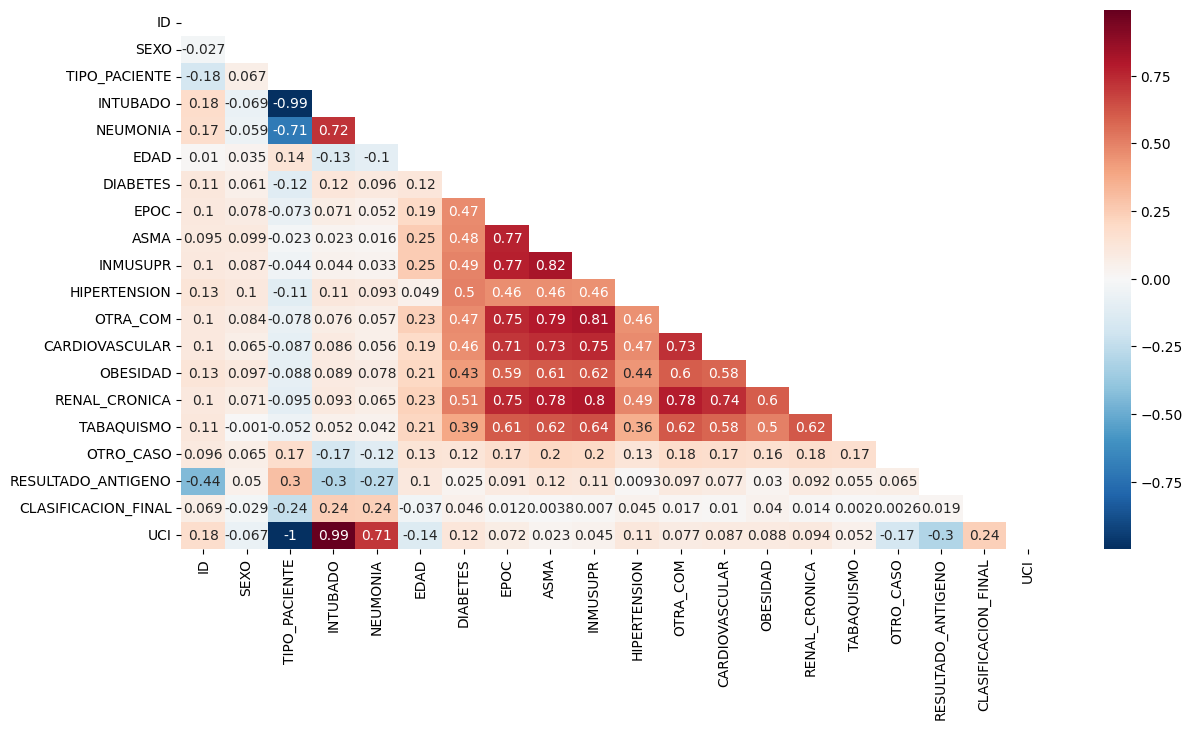

In [6]:
plt.figure(figsize=(14,7))
matriz_inf = np.triu(data_covid.corr())
sns.heatmap(data_covid.corr(), cmap='RdBu_r', annot=True, mask=matriz_inf)
plt.show()

**Varibles seleccionadas:**

Debido a la importancia de las variables de comorbilidad, se considerarán todas las variables para la construcción de los modelos.

#### **3) Definición de las variables predictoras y variable clase**

In [7]:
#Variables predictoras, las que nos van a ayudar a clasificar
x = np.array(data_covid[['SEXO',
                    'TIPO_PACIENTE',
                    'INTUBADO',
                    'NEUMONIA',
                    'EDAD',
                    'DIABETES',
                    'EPOC',
                    'ASMA',
                    'INMUSUPR',
                    'HIPERTENSION',
                    'OTRA_COM',
                    'CARDIOVASCULAR',
                    'OBESIDAD',
                    'RENAL_CRONICA',
                    'TABAQUISMO',
                    'OTRO_CASO',
                    'RESULTADO_ANTIGENO',
                    'CLASIFICACION_FINAL',
                    'UCI']])
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2,1,5,2,62,2,2,2,2,1,2,2,2,2,2,2,5,6,5
1,1,1,5,2,67,1,2,2,2,2,2,2,2,2,2,1,5,3,5
2,1,1,5,2,62,2,2,2,2,1,2,2,1,2,2,1,1,3,5
3,1,1,5,2,76,2,2,2,2,2,2,2,2,2,2,2,5,5,5
4,1,1,5,2,60,2,2,2,2,2,2,2,1,2,2,2,5,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591347,1,1,5,2,67,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591348,2,1,5,2,68,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591349,2,1,5,2,69,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591350,2,1,5,2,71,4,4,4,4,4,4,4,4,4,4,1,2,7,5


In [8]:
#Variable clase, variable dependiente.
y = np.array(data_covid[['SITUACION']])
pd.DataFrame(y)

,0
0,Vivo
1,Vivo
2,Vivo
3,Vivo
4,Vivo
...,...
591347,Vivo
591348,Vivo
591349,Vivo
591350,Vivo


### **II. Creación de los modelos**

In [9]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [11]:
print(len(x_train))
print(len(x_validation))

473081
118271


### **Modelo 1: Árboles de decisión (AD)**

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
#Se entrena el modelo a partir de los datos de entrada
#ClasificacionAD = DecisionTreeClassifier(random_state=0)
#ClasificacionAD.fit(X_train, Y_train)

clasificacion_ad = DecisionTreeClassifier(max_depth=20, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2,
                                         random_state=0)
clasificacion_ad.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [14]:
#Clasificación final 
y_clasificacion_ad = clasificacion_ad.predict(x_validation)
print(y_clasificacion_ad)

['Vivo' 'Vivo' 'Vivo' ... 'Vivo' 'Vivo' 'Vivo']


In [15]:
valores_mod_1 = pd.DataFrame(y_validation, y_clasificacion_ad)
valores_mod_1

,0
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
...,...
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo


In [16]:
accuracy_score(y_validation, y_clasificacion_ad)

0.9545366150620186

#### **Matriz de clasificación: Árbol de decisión**

In [17]:
#Matriz de clasificación
modelo_clasificacion_1 = clasificacion_ad.predict(x_validation)
matriz_clasificacion_1 = pd.crosstab(y_validation.ravel(), 
                                   modelo_clasificacion_1, 
                                   rownames=['Reales'], 
                                   colnames=['Clasificación']) 
matriz_clasificacion_1

Clasificación,Finado,Vivo
Reales,,
Finado,4178,2652
Vivo,2725,108716


In [18]:
#Reporte de la clasificación
print('Criterio: \n', clasificacion_ad.criterion)
print('Importancia variables: \n', clasificacion_ad.feature_importances_)
print("Exactitud:", accuracy_score(y_validation, y_clasificacion_ad))
print(classification_report(y_validation, y_clasificacion_ad))

Criterio: 
 gini
Importancia variables: 
 [0.0124339  0.         0.68002934 0.02016917 0.07811383 0.01436455
 0.00665636 0.00214946 0.00357291 0.0164422  0.00672919 0.00789075
 0.01123566 0.00593453 0.00953853 0.01341053 0.01498136 0.0909666
 0.00538113]
Exactitud: 0.9545366150620186
              precision    recall  f1-score   support

      Finado       0.61      0.61      0.61      6830
        Vivo       0.98      0.98      0.98    111441

    accuracy                           0.95    118271
   macro avg       0.79      0.79      0.79    118271
weighted avg       0.95      0.95      0.95    118271



In [19]:
importancia_mod_1 = pd.DataFrame({'Variable': list(data_covid[['SEXO',
                                                        'TIPO_PACIENTE',
                                                        'INTUBADO',
                                                        'NEUMONIA',
                                                        'EDAD',
                                                        'DIABETES',
                                                        'EPOC',
                                                        'ASMA',
                                                        'INMUSUPR',
                                                        'HIPERTENSION',
                                                        'OTRA_COM',
                                                        'CARDIOVASCULAR',
                                                        'OBESIDAD',
                                                        'RENAL_CRONICA',
                                                        'TABAQUISMO',
                                                        'OTRO_CASO',
                                                        'RESULTADO_ANTIGENO',
                                                        'CLASIFICACION_FINAL',
                                                        'UCI']]),
                                'Importancia': clasificacion_ad.feature_importances_}).sort_values('Importancia', ascending=False)
importancia_mod_1

,Variable,Importancia
2,INTUBADO,0.680029
17,CLASIFICACION_FINAL,0.090967
4,EDAD,0.078114
3,NEUMONIA,0.020169
9,HIPERTENSION,0.016442
16,RESULTADO_ANTIGENO,0.014981
5,DIABETES,0.014365
15,OTRO_CASO,0.013411
0,SEXO,0.012434
12,OBESIDAD,0.011236


In [20]:
from sklearn.tree import export_text
reporte = export_text(clasificacion_ad, feature_names = ['SEXO',
                                                        'TIPO_PACIENTE',
                                                        'INTUBADO',
                                                        'NEUMONIA',
                                                        'EDAD',
                                                        'DIABETES',
                                                        'EPOC',
                                                        'ASMA',
                                                        'INMUSUPR',
                                                        'HIPERTENSION',
                                                        'OTRA_COM',
                                                        'CARDIOVASCULAR',
                                                        'OBESIDAD',
                                                        'RENAL_CRONICA',
                                                        'TABAQUISMO',
                                                        'OTRO_CASO',
                                                        'RESULTADO_ANTIGENO',
                                                        'CLASIFICACION_FINAL',
                                                        'UCI'])
print(reporte)

|--- INTUBADO <= 4.00
|   |--- INTUBADO <= 1.50
|   |   |--- CLASIFICACION_FINAL <= 6.50
|   |   |   |--- OTRO_CASO <= 1.50
|   |   |   |   |--- EDAD <= 67.50
|   |   |   |   |   |--- RESULTADO_ANTIGENO <= 3.50
|   |   |   |   |   |   |--- EDAD <= 66.50
|   |   |   |   |   |   |   |--- EPOC <= 1.50
|   |   |   |   |   |   |   |   |--- class: Vivo
|   |   |   |   |   |   |   |--- EPOC >  1.50
|   |   |   |   |   |   |   |   |--- CARDIOVASCULAR <= 1.50
|   |   |   |   |   |   |   |   |   |--- DIABETES <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- RESULTADO_ANTIGENO <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Finado
|   |   |   |   |   |   |   |   |   |   |--- RESULTADO_ANTIGENO >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Finado
|   |   |   |   |   |   |   |   |   |--- DIABETES >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: Vivo
|   |   |   |   |   |   |   |   |--- CARDIOVASCULAR >  1.50
|   |   |   |   |   |   |   |   |   |--- H

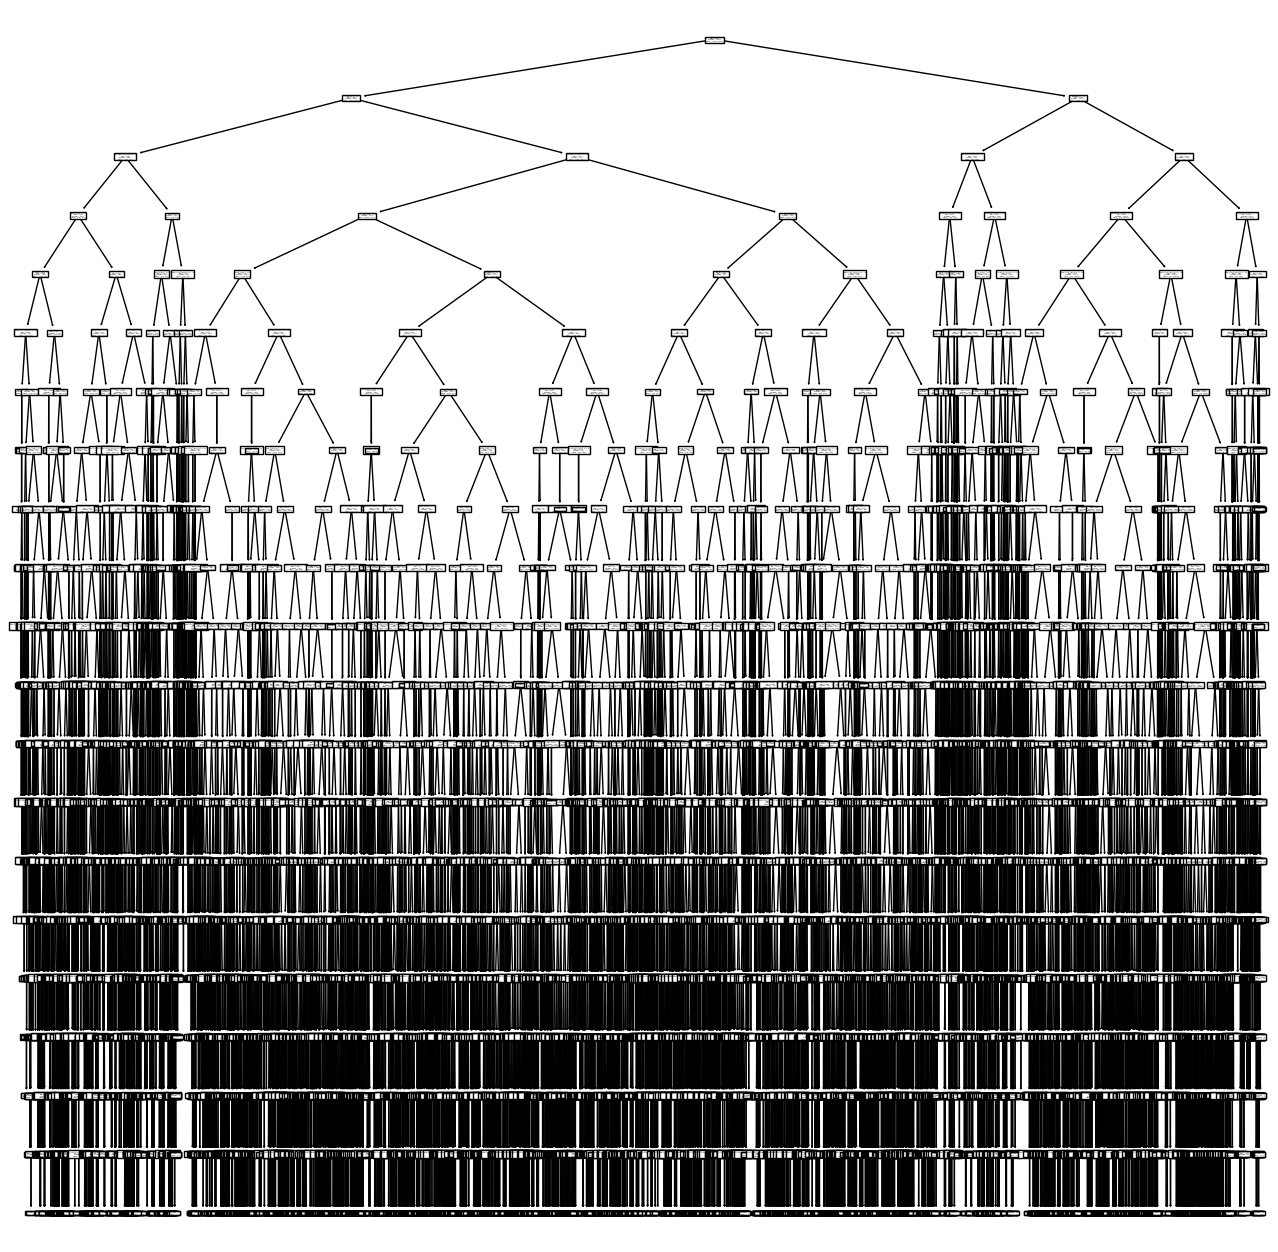

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(clasificacion_ad, feature_names = ['SEXO',
                                            'TIPO_PACIENTE',
                                            'INTUBADO',
                                            'NEUMONIA',
                                            'EDAD',
                                            'DIABETES',
                                            'EPOC',
                                            'ASMA',
                                            'INMUSUPR',
                                            'HIPERTENSION',
                                            'OTRA_COM',
                                            'CARDIOVASCULAR',
                                            'OBESIDAD',
                                            'RENAL_CRONICA',
                                            'TABAQUISMO',
                                            'OTRO_CASO',
                                            'RESULTADO_ANTIGENO',
                                            'CLASIFICACION_FINAL',
                                            'UCI'])
plt.show()

### **Modelo 2: Bosques aleatorios (BA)**

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clasificacion_ba = RandomForestClassifier(random_state=0)
clasificacion_ba.fit(x_train, y_train)

#ClasificacionBA = RandomForestClassifier(n_estimators=100,
#                                         max_depth=12, 
#                                         min_samples_split=4, 
#                                         min_samples_leaf=2, 
#                                         random_state=0)
#ClasificacionBA.fit(X_train, Y_train)

<ipython-input-23-e35823e35fb4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clasificacion_ba.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [24]:
#Clasificación final 
y_clasificacion_ba = clasificacion_ba.predict(x_validation)
print(y_clasificacion_ba)

['Vivo' 'Vivo' 'Vivo' ... 'Vivo' 'Vivo' 'Vivo']


In [25]:
valores_mod_2 = pd.DataFrame(y_validation, y_clasificacion_ba)
valores_mod_2

,0
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
...,...
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo


In [26]:
accuracy_score(y_validation, y_clasificacion_ba)

0.9560162677241251

#### **Matriz de clasificación: Bosques aleatorios**

In [27]:
#Matriz de clasificación
modelo_clasificacion_2 = clasificacion_ba.predict(x_validation)
matriz_clasificacion_2 = pd.crosstab(y_validation.ravel(),
                                    modelo_clasificacion_2,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
matriz_clasificacion_2

Clasificación,Finado,Vivo
Reales,,
Finado,3925,2905
Vivo,2297,109144


In [28]:
#Reporte de la clasificación
print('Criterio: \n', clasificacion_ba.criterion)
print('Importancia variables: \n', clasificacion_ba.feature_importances_)
print("Exactitud:", accuracy_score(y_validation, y_clasificacion_ba))
print(classification_report(y_validation, y_clasificacion_ba))

Criterio: 
 gini
Importancia variables: 
 [0.01194389 0.14270827 0.17180165 0.08798376 0.1836613  0.01850889
 0.01018884 0.00385787 0.00585918 0.01888164 0.01002567 0.0103335
 0.01564713 0.00952607 0.01308099 0.02440216 0.02786577 0.07838914
 0.15533429]
Exactitud: 0.9560162677241251
              precision    recall  f1-score   support

      Finado       0.63      0.57      0.60      6830
        Vivo       0.97      0.98      0.98    111441

    accuracy                           0.96    118271
   macro avg       0.80      0.78      0.79    118271
weighted avg       0.95      0.96      0.96    118271



In [29]:
importancia_2 = pd.DataFrame({'Variable': list(data_covid[['SEXO',
                                                     'TIPO_PACIENTE',
                                                     'INTUBADO',
                                                     'NEUMONIA',
                                                     'EDAD',
                                                     'DIABETES',
                                                     'EPOC',
                                                     'ASMA',
                                                     'INMUSUPR',
                                                     'HIPERTENSION',
                                                     'OTRA_COM',
                                                     'CARDIOVASCULAR',
                                                     'OBESIDAD',
                                                     'RENAL_CRONICA',
                                                     'TABAQUISMO',
                                                     'OTRO_CASO',
                                                     'RESULTADO_ANTIGENO',
                                                     'CLASIFICACION_FINAL',
                                                     'UCI']]), 
                             'Importancia': clasificacion_ba.feature_importances_}).sort_values('Importancia', ascending=False)
importancia_2

,Variable,Importancia
4,EDAD,0.183661
2,INTUBADO,0.171802
18,UCI,0.155334
1,TIPO_PACIENTE,0.142708
3,NEUMONIA,0.087984
17,CLASIFICACION_FINAL,0.078389
16,RESULTADO_ANTIGENO,0.027866
15,OTRO_CASO,0.024402
9,HIPERTENSION,0.018882
5,DIABETES,0.018509


### **III. Validación (Rendimiento)**

In [30]:
print("Árbol de decisión:", accuracy_score(y_validation, y_clasificacion_ad))
print("Bosque aleatorio:", accuracy_score(y_validation, y_clasificacion_ba))

Árbol de decisión: 0.9545366150620186
Bosque aleatorio: 0.9560162677241251


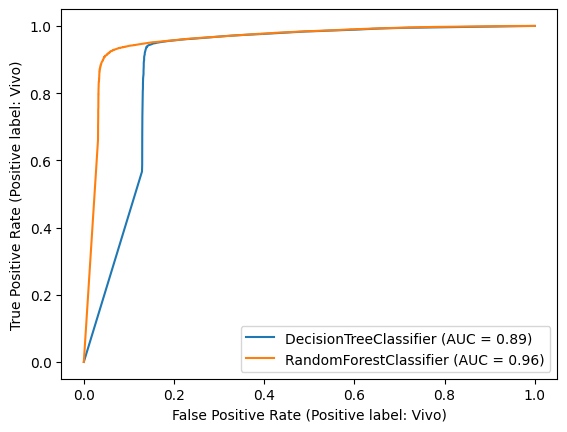

In [31]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(clasificacion_ad,
                               x_validation,
                               y_validation,
                               ax = ax)
metrics.RocCurveDisplay.from_estimator(clasificacion_ba,
                                         x_validation,
                                         y_validation,
                                         ax = ax)
plt.show()

### **IV. Nuevas clasificaciones**

In [32]:
#Paciente
paciente_covid = pd.DataFrame({'SEXO': [2],
                              'TIPO_PACIENTE': [1],
                              'INTUBADO': [5],
                              'NEUMONIA': [2],
                              'EDAD': [62],
                              'DIABETES': [2],
                              'EPOC': [2],
                              'ASMA': [2],
                              'INMUSUPR': [2],
                              'HIPERTENSION': [1],
                              'OTRA_COM': [2],
                              'CARDIOVASCULAR': [2],
                              'OBESIDAD': [2],
                              'RENAL_CRONICA': [2],
                              'TABAQUISMO': [2],
                              'OTRO_CASO': [2],
                              'RESULTADO_ANTIGENO': [5],
                              'CLASIFICACION_FINAL': [6],
                              'UCI': [5]})
clasificacion_ba.predict(paciente_covid)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Vivo'], dtype=object)